<a href="https://colab.research.google.com/github/aidenrosebush/ESC472-2023/blob/main/Viewshed_LOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tcod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.9 MB/s eta 0:00:00


In [14]:
import tcod
import numpy as np
import matplotlib.pyplot as plt

def getTestPoints(map, point, direction, r):
  testPoints = [] #points on the same side as the ad is facing
  for i in range(0, len(map), 1): 
    for j in range(0, len(map[0]), 1):
      relativeTestPoint = np.array([i-point[0],j-point[1]])
      #if the point is on the right side of the billboard and is within visible range
      if np.dot(relativeTestPoint, direction) >= 0 and np.sqrt(np.dot(relativeTestPoint, relativeTestPoint)) <= r:
        testPoints += [np.array([i,j])]
  return testPoints
def plotTestPoints(map, testPoints):
  fig, ax = plt.subplots()
  coloredMap = np.zeros((len(map), len(map[0])))
  for testPoint in testPoints:
    coloredMap[testPoint[0], testPoint[1]] = 1
  ax.imshow(coloredMap)
  ax.set_title('Test Points')
  return
def plotMap(map):
  fig, ax = plt.subplots()
  im = ax.imshow(map)
  ax.set_title('Elevation Map')
  fig.colorbar(im, ax=ax, label='Elevation')
def fitSightLine(map, point, testPoint, elevation):
  # y-y0 = m*(r)
  m = (map[testPoint[0]][testPoint[1]]-elevation)/(np.sqrt(sum((point-testPoint)**2)))
  return m
def getViewshed(map, point, direction, r, elevation):
  point = np.array(point)
  t = getTestPoints(map, point, direction, r)
  plotMap(map)
  plotTestPoints(map, t)
  line = []
  visiblePoints = []

  for testPoint in t:
    if testPoint[0] != point[0] and testPoint[1] != point[1]: #don't consider the ad location itself
      elevations = []
      line = tcod.los.bresenham(point,testPoint) #get grid coordinates to search through
      max = -1 #elevation data must bottom out at 0
      m = 0 #store slope of top sightline
      m_test = 0 #store slope of sightline of test point when the test point is not above any point yet seen
      visible = True
      m = fitSightLine(map, point, line[1], elevation)
      for i in range(2, len(line), 1):
        m_test = fitSightLine(map, point, line[i], elevation)
        if m_test >= m:
          m = m_test
          visiblePoints += [line[i]]
  return visiblePoints
def plotVisiblePoints(map, visiblePoints):
  fig, ax = plt.subplots()
  coloredMap = np.zeros((len(map), len(map[0])))
  for point in visiblePoints:
    coloredMap[point[0], point[1]] = 1
  ax.imshow(coloredMap)
  ax.set_title('Visible Points')
  return



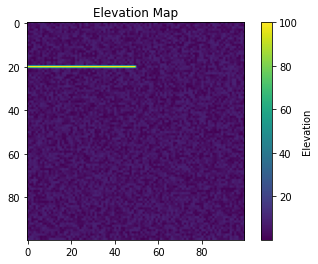

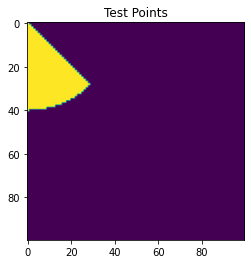

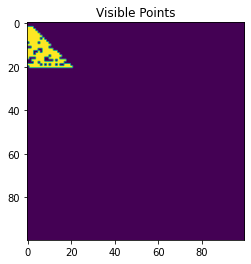

In [19]:
map = np.random.uniform(0, 10, (100,100))
for i in range(0,50,1):
  map[20][i] = 100
point = [0,0]
direction = [1,-1]
r = 40
elevation = 40
v = getViewshed(map, point, direction, r, elevation)
plotVisiblePoints(map, v)
